In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [40]:
df = pd.read_csv("data.csv")
df

,District,State,Students,ELL_Percent,IEP_Percent,Pupil_Teacher_Ratio,Exp_Rev_Ratio,Strike
0,ALABASTER CITY,Alabama,6114,0.06,0.07,16.92,1.140,0
1,ALBERTVILLE CITY,Alabama,5447,0.16,0.04,18.78,1.044,0
2,ALEXANDER CITY,Alabama,3055,0.02,0.09,16.47,0.939,0
3,ANDALUSIA CITY,Alabama,1744,0.01,0.08,17.71,1.003,0
4,ANNISTON CITY,Alabama,2069,0.01,0.09,16.49,1.024,0
5,ARAB CITY,Alabama,2612,0.01,0.06,16.30,1.078,0
6,ATHENS CITY,Alabama,5101,0.06,0.07,24.47,0.998,0
7,ATTALLA CITY,Alabama,1611,0.02,0.08,17.15,0.987,0
8,AUBURN CITY,Alabama,8543,0.02,0.07,17.76,0.937,0
9,AUTAUGA COUNTY,Alabama,9307,0.01,0.07,17.73,0.955,0


In [3]:
X1 = df.drop("Strike",axis=1)
X2 = X1.drop("District",axis=1)
X = X2.drop("State",axis=1)
y = df["Strike"]
print(X.shape, y.shape)
print(X,y)

(6922, 5) (6922,)
      Students  ELL_Percent  IEP_Percent  Pupil_Teacher_Ratio  Exp_Rev_Ratio
0         6114         0.06         0.07                16.92          1.140
1         5447         0.16         0.04                18.78          1.044
2         3055         0.02         0.09                16.47          0.939
3         1744         0.01         0.08                17.71          1.003
4         2069         0.01         0.09                16.49          1.024
5         2612         0.01         0.06                16.30          1.078
6         5101         0.06         0.07                24.47          0.998
7         1611         0.02         0.08                17.15          0.987
8         8543         0.02         0.07                17.76          0.937
9         9307         0.01         0.07                17.73          0.955
10       31268         0.03         0.09                17.81          0.899
11        3605         0.03         0.06                18

In [4]:
1- sum(y)/len(y)

0.930222479052297

In [5]:
class_weight = {0:0.07, 1:0.93}

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X)

In [7]:
X_scaled = X_scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(penalty='l2', solver='saga', class_weight=class_weight)
classifier = LogisticRegression(class_weight=class_weight)
classifier

LogisticRegression(C=1.0, class_weight={0: 0.07, 1: 0.93}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [10]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.07, 1: 0.93}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_predict = classifier.predict(X_test)

In [12]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Validation Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.5448798988621998
Validation Data Score: 0.5184115523465704


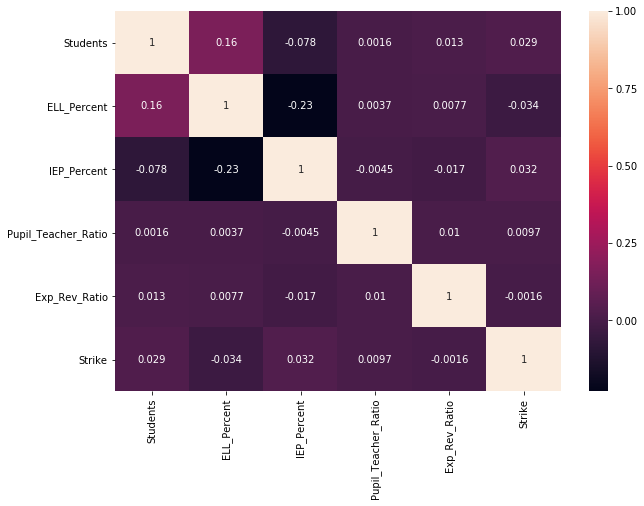

In [13]:
# Let's check the correlation between the variables 
plt.figure(figsize=(10,7)) 
sns.heatmap(df.corr(),annot=True) 

In [14]:
train_pred = classifier.predict(X_train)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_train, train_pred).ravel()

In [16]:
(tn, fp, fn, tp)

(2746, 2399, 121, 271)

In [17]:
test_tn, test_fp, test_fn, test_tp = confusion_matrix(y_test, y_predict).ravel()

In [18]:
(test_tn, test_fp, test_fn, test_tp)

(654, 640, 27, 64)

In [19]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict)

0.7032967032967034

In [20]:
precision = (test_tp)/(test_tp + test_fp)
precision

0.09090909090909091

In [21]:
accuracy = (test_tp + test_tn)/(test_tp + test_tn + test_fp + test_fn)
accuracy

0.5184115523465704

In [22]:
classifier.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [23]:
classifier.predict_proba(X_train)

array([[0.54218317, 0.45781683],
       [0.53731994, 0.46268006],
       [0.42772445, 0.57227555],
       ...,
       [0.4730417 , 0.5269583 ],
       [0.52272224, 0.47727776],
       [0.50377743, 0.49622257]])

In [42]:
pickle.dump(classifier, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict(X_scaler.transform([[100000, 0.5, 0.25, 20, 1]])))
print(model.predict_proba(X_scaler.transform([[100000, 0.5, 0.25, 20, 1]])))

[1]
[[0.44487081 0.55512919]]
